In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager

import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False

In [28]:
lam = 0.4 #lambda
mu = 0.25 #mu
rho = 0.1 #discount factor lam+2*mu+rho=1
cost = 0.05 #technological cost
a = 0.9 #fault probability
p1 = 0.9
p2 = 0.1
theta = 0.0005 #converge threshold
maxLength = 32

In [29]:
threshold = np.zeros([maxLength+1, maxLength+1])
for i in range(maxLength-1):
    for j in range(maxLength-1):
        if i == j:
            threshold[i][j] = 0
        else:
            threshold[i][j] = max(1-(mu*(i+j)-lam*min(i,j))/(a*lam*(p1*i+p2*j-min(i,j))),0)

In [30]:
#policy iteration
value = np.zeros([maxLength+1, maxLength+1])
policy = np.zeros([maxLength+1, maxLength+1])
while True:
    while True:
        delta = 0
        val = value.copy()
        for x in range(maxLength+1):
            for y in range(maxLength+1):
                v = value[x][y]
                b = policy[x][y]
                xx = min(x+1,maxLength)
                yy = min(y+1,maxLength)
#                 if(val[xx][y] != val[x][yy]):
#                     print(x, y, val[xx][y], val[x][yy])
                if xx == x or yy == y:
                    value[x][y] = x+y+cost*b+mu*(val[max(x-1,0)][y]+val[x][max(y-1,0)])+(1-(1-b)*a)*lam*max(val[xx][y],val[x][yy])+p1*(1-b)*a*lam*val[xx][y]+p2*(1-b)*a*lam*val[x][yy]
                else:
                    value[x][y] = x+y+cost*b+mu*(val[max(x-1,0)][y]+val[x][max(y-1,0)])+(1-(1-b)*a)*lam*min(val[xx][y],val[x][yy])+p1*(1-b)*a*lam*val[xx][y]+p2*(1-b)*a*lam*val[x][yy]
#                 print(value[x][y])
                delta = max(delta, abs(v-value[x][y]))
#         print(delta)
        if delta<theta:
#             for i in range(maxLength-1):
#                 for j in range(maxLength-1):
#                     print(int(value[i][j])," ",end="")
#                 print()
#             print()
            break
    stable = True
    for x in range(maxLength+1):
        for y in range(maxLength+1):
            old = policy[x][y]
            xx = min(x+1,maxLength)
            yy = min(y+1,maxLength)
            diff = a*lam*(p1*value[xx][y]+p2*value[x][yy]-min(value[xx][y],value[x][yy]))
            if diff <= cost:
                policy[x][y] = threshold[x][y]
            else:
                policy[x][y] = 1
            if old != policy[x][y]:
                stable = False
    if stable:
        break

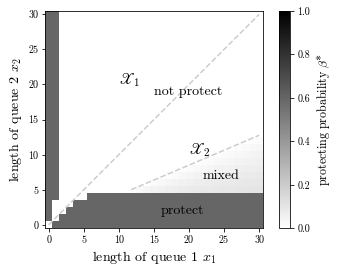

In [35]:
# Z is your data set
N = maxLength-1
Z = np.transpose(policy[:N,:N])

# G is a NxNx3 matrix
G = np.zeros((N,N,3))

for i in range(N):
    for j in range(N):
        z_ij = Z[i][j]
        G[i][j] = [1-0.6*z_ij,1-0.6*z_ij,1-0.6*z_ij]

plt.imshow(G,interpolation='nearest', cmap = 'gray_r',vmin=0,vmax=1)
plt.gca().invert_yaxis()
cbar = plt.colorbar(orientation="vertical")
cbar.set_label(r"protecting probability $\beta$*",size =12)
plt.yticks([y for y in range(N) if y % 5 == 0])
plt.text(15, 18.5, "not protect", size=14)
plt.text(16, 1.5, "protect", size=14)
plt.text(22, 6.5, "mixed", size=14)
plt.text(10, 20, "$\mathscr{X}_1$", size=16)
plt.text(20, 10, "$\mathscr{X}_2$", size=16)
plt.plot([0, 30], [0, 30], ls="--", c=".8")
plt.plot([11.76, 30], [5, 12.76], ls="--", c=".8")
plt.xlabel('length of queue 1 $x_1$', size=14)
plt.ylabel('length of queue 2 $x_2$', size=14)
# plt.show()
plt.savefig("Fig5.eps")

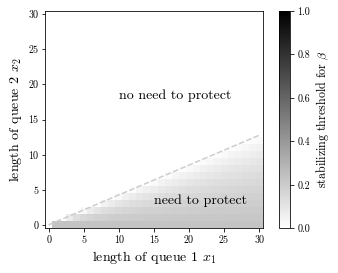

In [36]:
# Z is your data set
N = maxLength-1
W = np.transpose(threshold[:N,:N])

# H is a NxNx3 matrix
H = np.zeros((N,N,3))


for i in range(N):
    for j in range(N):
        w_ij = W[i][j]
        H[i][j] = [1-w_ij,1-w_ij,1-w_ij]

plt.imshow(H,interpolation='nearest',cmap='gray_r',vmin=0,vmax=1)
plt.gca().invert_yaxis()
cbar = plt.colorbar(orientation="vertical")
cbar.set_label(r"stabilizing threshold for $\beta$",size =12)
plt.yticks([y for y in range(N) if y % 5 == 0])
plt.text(10, 18, "no need to protect", size=14)
plt.text(15, 3, "need to protect", size=14)
plt.plot([0, 30], [0, 12.76], ls="--", c=".8")
plt.xlabel('length of queue 1 $x_1$', size=14)
plt.ylabel('length of queue 2 $x_2$', size=14)
# plt.show()
plt.savefig("Fig4.eps")